## iris 품종 분류 예측 경진대회

- https://dacon.io/competitions/open/236070/overview/description


- species: 꽃의 종류

- sepal length (cm): 꽃받침의 길이

- petal length (cm): 꽃잎의 길이

- sepal width (cm): 꽃받침의 폭

- petal width (cm): 꽃잎의 폭

In [11]:
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [95]:
iris_dataframe = pd.read_csv('./iris_data/train.csv', index_col=False)
iris_dataframe.columns = iris_dataframe.columns.str.replace(' ', '_')
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### EDA

In [96]:
iris_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 120 non-null    int64  
 1   sepal_length_(cm)  120 non-null    float64
 2   sepal_width_(cm)   120 non-null    float64
 3   petal_length_(cm)  120 non-null    float64
 4   petal_width_(cm)   120 non-null    float64
 5   species            120 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 5.8 KB


In [97]:
iris_dataframe.isna().sum()

id                   0
sepal_length_(cm)    0
sepal_width_(cm)     0
petal_length_(cm)    0
petal_width_(cm)     0
species              0
dtype: int64

AxesSubplot(0.125,0.11;0.775x0.77)


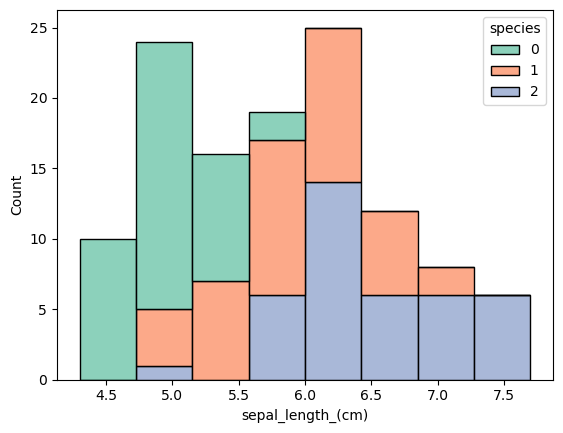

In [98]:
print(sns.histplot(data=iris_dataframe, x='sepal_length_(cm)', hue='species', palette='Set2', multiple='stack'))

- 꽃받침의 길이(sepal_length)가 긴 품종은 '2'이다.

AxesSubplot(0.125,0.11;0.775x0.77)


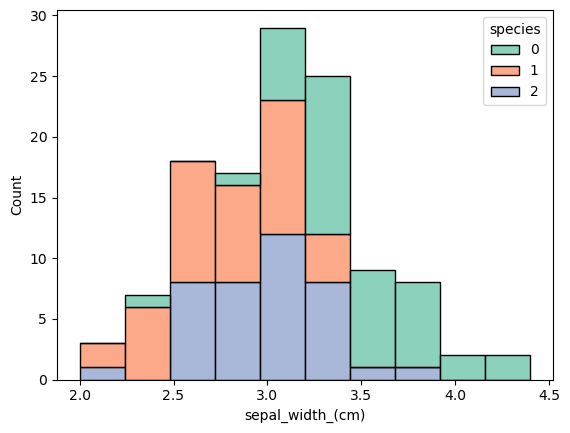

In [99]:
print(sns.histplot(data=iris_dataframe, x='sepal_width_(cm)', hue='species', palette='Set2', multiple='stack'))

- 꽃받침의 폭(sepal_width)이 넓은 품종은 '0'이다.

AxesSubplot(0.125,0.11;0.775x0.77)


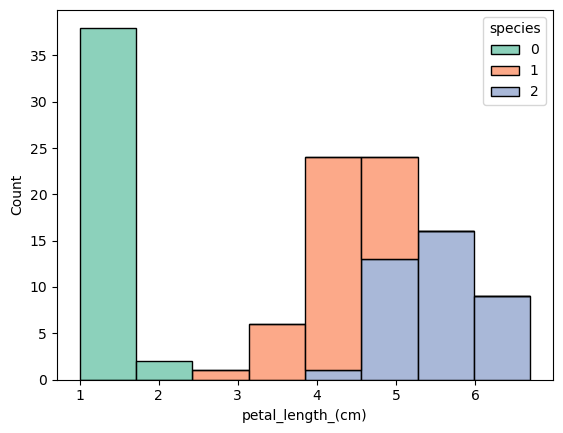

In [100]:
print(sns.histplot(data=iris_dataframe, x='petal_length_(cm)', hue='species', palette='Set2', multiple='stack'))

- 꽃잎의 길이(petal_length)가 긴 품종은 '2'이다.

AxesSubplot(0.125,0.11;0.775x0.77)


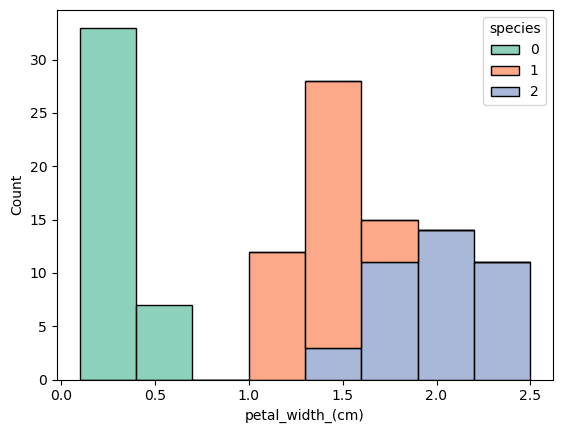

In [101]:
print(sns.histplot(data=iris_dataframe, x='petal_width_(cm)', hue='species', palette='Set2', multiple='stack'))

- 꽃잎의 폭(petal_width)이 넓은 품종은 '2'이다.

- 전체적으로 종합할 때, 붓꽃의 품종 중 '2'가 상대적으로 크기가 크다는 것을 알 수 있다.

In [102]:
iris_dataframe.corr()

,id,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),species
id,1.000000,0.140774,-0.204991,0.192150,0.192644,0.203259
sepal_length_(cm),0.140774,1.000000,-0.106926,0.862175,0.801480,0.763847
sepal_width_(cm),-0.204991,-0.106926,1.000000,-0.432089,-0.369509,-0.444109
petal_length_(cm),0.192150,0.862175,-0.432089,1.000000,0.962577,0.947794
petal_width_(cm),0.192644,0.801480,-0.369509,0.962577,1.000000,0.951276
species,0.203259,0.763847,-0.444109,0.947794,0.951276,1.000000


- 꽃받침의 폭(sepal_width)을 제외하고는 품종과 강한 상관관계가 있다. 따라서 붓꽃의 품종을 결정하는 것은 꽃받침의 길이, 꽃잎의 길이, 꽃잎의 폭이라는 것을 알 수 있다.

<AxesSubplot: >

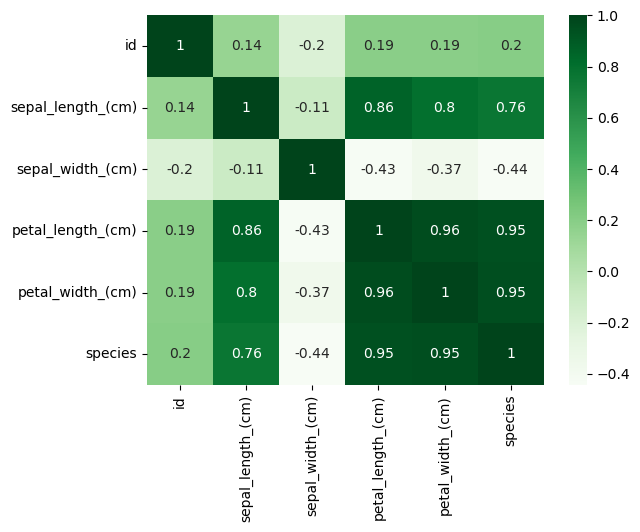

In [103]:
sns.heatmap(data=iris_dataframe.corr(), annot=True, cmap='Greens')

### 품종 분류 예측하기

In [126]:
iris_train = pd.read_csv('./iris_data/train.csv')
X_train = iris_train.drop(columns=['id'])
y_train = iris_train['species']
    
iris_test = pd.read_csv('./iris_data/test.csv')
X_test = iris_test.drop(columns=['id'])


In [128]:
X_train, X_test, y_train, y_test = train_test_split(iris_train, iris_test, test_size=0.2, random_state=11)


ValueError: Found input variables with inconsistent numbers of samples: [120, 30]